In [261]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

warnings.simplefilter(action='ignore', category=FutureWarning) 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-segmentation-using-k-means/scikitlearn/default/1/customer_segmentation_using_k_means.py
/kaggle/input/customer-segmentation-using-k-means/scikitlearn/default/1/customer.csv


In [262]:
df = pd.read_csv('/kaggle/input/customer-segmentation-using-k-means/scikitlearn/default/1/customer.csv')

In [263]:
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [264]:
df.shape

(850, 10)

In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      850 non-null    int64  
 1   Age              850 non-null    int64  
 2   Edu              850 non-null    int64  
 3   Years Employed   850 non-null    int64  
 4   Income           850 non-null    int64  
 5   Card Debt        850 non-null    float64
 6   Other Debt       850 non-null    float64
 7   Defaulted        700 non-null    float64
 8   Address          850 non-null    object 
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 66.5+ KB


# **Description**

Il dataset contiene informazioni anagrafiche ed economiche di **850 clienti**. 

Le variabili presenti risultano utili per analizzare la stabilità finanziaria e costruire uno **score di rischio** basato sul rapporto **debito/reddito**.

## Struttura del dataset

| Colonna            | Tipo      | Descrizione                                                                 |
|--------------------|----------|-----------------------------------------------------------------------------|
| `Customer Id`      | Integer  | Identificativo univoco del cliente                                          |
| `Age`              | Integer  | Età del cliente (anni)                                                      |
| `Edu`              | Integer  | Livello di istruzione (codificato numericamente)                            |
| `Years Employed`   | Integer  | Numero di anni di esperienza lavorativa                                     |
| `Income`           | Float    | Reddito annuo del cliente                                                   |
| `Card Debt`        | Float    | Importo debito su carte di credito                                          |
| `Other Debt`       | Float    | Importo di altri debiti (prestiti, mutui, ecc.)                             |
| `Defaulted`        | Float   | Indicatore se il cliente ha avuto default (1 = sì, 0 = no)                  |
| `Address`          | String   | Codice area/indirizzo del cliente                                           |
| `DebtIncomeRatio`  | Float    | Rapporto Debito/Reddito = (Card Debt + Other Debt) / Income × 100           |

## Dimensioni
- **850 righe** (clienti)  
- **10 colonne** (variabili)  

## Possibili utilizzi

- Segmentazione dei clienti per reddito, età e indebitamento  
- Analisi del rischio di credito (sarebbe opportuno definire delle fasce di rischio e assegnare un punteggio ad onguna di esse).
- Costruzione di modelli predittivi (es. default)  
- Visualizzazioni in Tableau (Debt Ratio, fasce di reddito, profilo clienti, filtrato per punteggio di rischio)  


# Exploration

In [266]:
df.isna().mean()

Customer Id        0.000000
Age                0.000000
Edu                0.000000
Years Employed     0.000000
Income             0.000000
Card Debt          0.000000
Other Debt         0.000000
Defaulted          0.176471
Address            0.000000
DebtIncomeRatio    0.000000
dtype: float64

In [267]:
df['Defaulted'].unique()

array([ 0.,  1., nan])

In [268]:
df.dropna()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2
...,...,...,...,...,...,...,...,...,...,...
844,845,41,1,7,43,0.694,1.198,0.0,NBA011,4.4
846,847,28,2,7,34,0.359,2.021,0.0,NBA002,7.0
847,848,25,4,0,18,2.802,3.210,1.0,NBA001,33.4
848,849,32,1,12,28,0.116,0.696,0.0,NBA012,2.9


In [269]:
df.tail(10)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
840,841,38,3,13,25,0.343,1.082,0.0,NBA018,5.7
841,842,29,3,7,63,0.572,2.893,0.0,NBA001,5.5
842,843,32,1,14,36,0.273,0.591,0.0,NBA000,2.4
843,844,32,2,8,45,0.982,0.683,0.0,NBA002,3.7
844,845,41,1,7,43,0.694,1.198,0.0,NBA011,4.4
845,846,27,1,5,26,0.548,1.220,NaN,NBA007,6.8
846,847,28,2,7,34,0.359,2.021,0.0,NBA002,7.0
847,848,25,4,0,18,2.802,3.210,1.0,NBA001,33.4
848,849,32,1,12,28,0.116,0.696,0.0,NBA012,2.9
849,850,52,1,16,64,1.866,3.638,0.0,NBA025,8.6


In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      850 non-null    int64  
 1   Age              850 non-null    int64  
 2   Edu              850 non-null    int64  
 3   Years Employed   850 non-null    int64  
 4   Income           850 non-null    int64  
 5   Card Debt        850 non-null    float64
 6   Other Debt       850 non-null    float64
 7   Defaulted        700 non-null    float64
 8   Address          850 non-null    object 
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 66.5+ KB


In [271]:
df.describe()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
count,850.00000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000,850.000000
mean,425.50000,35.029412,1.710588,8.565882,46.675294,1.576820,3.078773,0.261429,10.171647
std,245.51816,8.041432,0.927784,6.777884,38.543054,2.125843,3.398799,0.439727,6.719441
min,1.00000,20.000000,1.000000,0.000000,13.000000,0.012000,0.046000,0.000000,0.100000
25%,213.25000,29.000000,1.000000,3.000000,24.000000,0.382500,1.045750,0.000000,5.100000
50%,425.50000,34.000000,1.000000,7.000000,35.000000,0.885000,2.003000,0.000000,8.700000
75%,637.75000,41.000000,2.000000,13.000000,55.750000,1.898500,3.903250,1.000000,13.800000
max,850.00000,56.000000,5.000000,33.000000,446.000000,20.561000,35.197000,1.000000,41.300000


# Segmentazione dei clienti per reddito, età e indebitamento

In [272]:
df['Total Debt'] = df['Card Debt'] + df['Other Debt']

In [273]:
round(df['Total Debt'],2)

0       1.20
1      12.80
2      11.91
3       1.20
4      18.22
       ...  
845     1.77
846     2.38
847     6.01
848     0.81
849     5.50
Name: Total Debt, Length: 850, dtype: float64

In [274]:
df['Total Debt(K)'] = df['Total Debt']
df.sample()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio,Total Debt,Total Debt(K)
359,360,21,1,1,18,0.159,2.955,0.0,NBA001,17.3,3.114,3.114


_______________

### Reddito

In [275]:
# reddito

#1 fasce mass <50, lower affluent 50-100 , affluent 10-250, upper affluent >250

in_bin = (0, 50, 100, 250, 500)
in_labels = ('Mass', 'Lower Affluent', 'Affluent', 'Upper Affluent')

df['Income_label'] = pd.cut(df['Income'], bins=in_bin, labels=in_labels, right=False)

#2 Income_band

df['Score Income'] = df['Income_label'].apply(
    lambda x: 1 if x == 'Mass'
    else 2 if x == 'Lower Affluent'
    else 3 if x == 'Affluent'
    else 4 if x =='Upper Affluent'
    else 5
)

In [276]:
df['Score Income'].value_counts()

Score Income
1    595
2    192
3     58
4      5
Name: count, dtype: int64

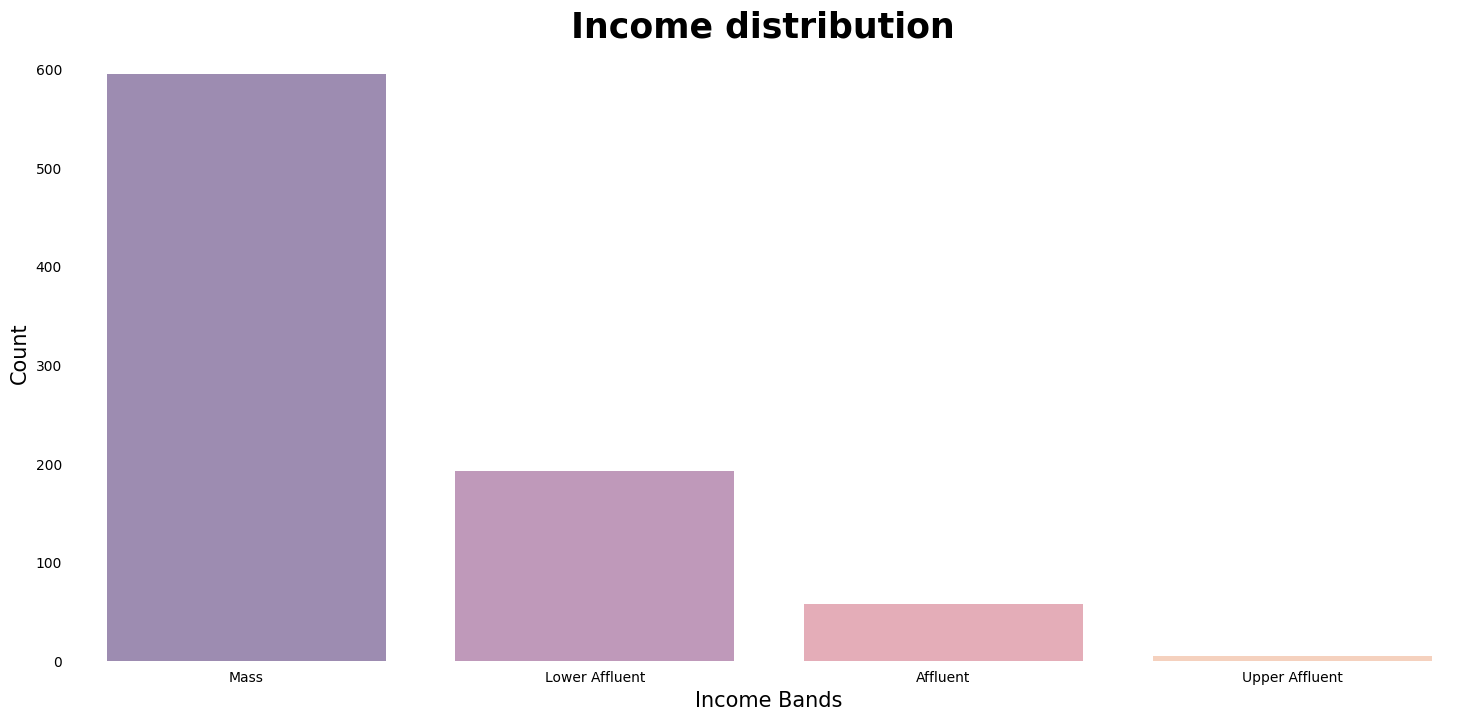

In [277]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

plt.figure(figsize=(18,8))

fontdict = {
    'fontname': 'sans-serif',
    'fontweight': 'bold',
    'fontsize': 25
}

fontdict2 = {
    'fontname': 'sans-serif',
    'fontweight': 'regular',
    'fontsize': 15
}

sns.countplot(x = df['Income_label'], palette='magma', alpha=0.5)

plt.xlabel('Income Bands', fontdict=fontdict2)
plt.ylabel('Count', fontdict=fontdict2 )

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.title('Income distribution ', fontdict=fontdict)

#less is more -> get blank
ax = plt.gca()
for spine in ['top', 'right', 'left', 'bottom']:
    ax.spines[spine].set_visible(False)
ax.tick_params(left=False, bottom=False)

plt.show()

____________

### Indebitamento

In [278]:
print(df['DebtIncomeRatio'].min(), df['DebtIncomeRatio'].max())


0.1 41.3


In [279]:
df['DebtRatio'] = df['DebtIncomeRatio']/100
df.sample()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio,Total Debt,Total Debt(K),Income_label,Score Income,DebtRatio
657,658,37,3,16,50,7.32,10.98,1.0,NBA014,36.6,18.3,18.3,Lower Affluent,2,0.366


In [280]:
df['DebtIncomeRatio (%)'] = df['DebtIncomeRatio']
df.drop(columns= 'DebtIncomeRatio')

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,Total Debt,Total Debt(K),Income_label,Score Income,DebtRatio,DebtIncomeRatio (%)
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,1.197,1.197,Mass,1,0.063,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.800,12.800,Affluent,3,0.128,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,11.913,11.913,Lower Affluent,2,0.209,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,1.197,1.197,Mass,1,0.063,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,18.216,18.216,Upper Affluent,4,0.072,7.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,846,27,1,5,26,0.548,1.220,NaN,NBA007,1.768,1.768,Mass,1,0.068,6.8
846,847,28,2,7,34,0.359,2.021,0.0,NBA002,2.380,2.380,Mass,1,0.070,7.0
847,848,25,4,0,18,2.802,3.210,1.0,NBA001,6.012,6.012,Mass,1,0.334,33.4
848,849,32,1,12,28,0.116,0.696,0.0,NBA012,0.812,0.812,Mass,1,0.029,2.9


In [281]:
# indebitamento

db_bins= (0, 0.05, 0.1, 0.15, 0.2, 5)
bd_labels= ('1', '2', '3', '4', '5')

df['Score DebtRatio'] =  pd.cut(df['DebtRatio'], bins=db_bins, labels=bd_labels, right=False)
df.sample()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio,Total Debt,Total Debt(K),Income_label,Score Income,DebtRatio,DebtIncomeRatio (%),Score DebtRatio
20,21,29,2,6,25,0.585,0.465,0.0,NBA009,4.2,1.05,1.05,Mass,1,0.042,4.2,1


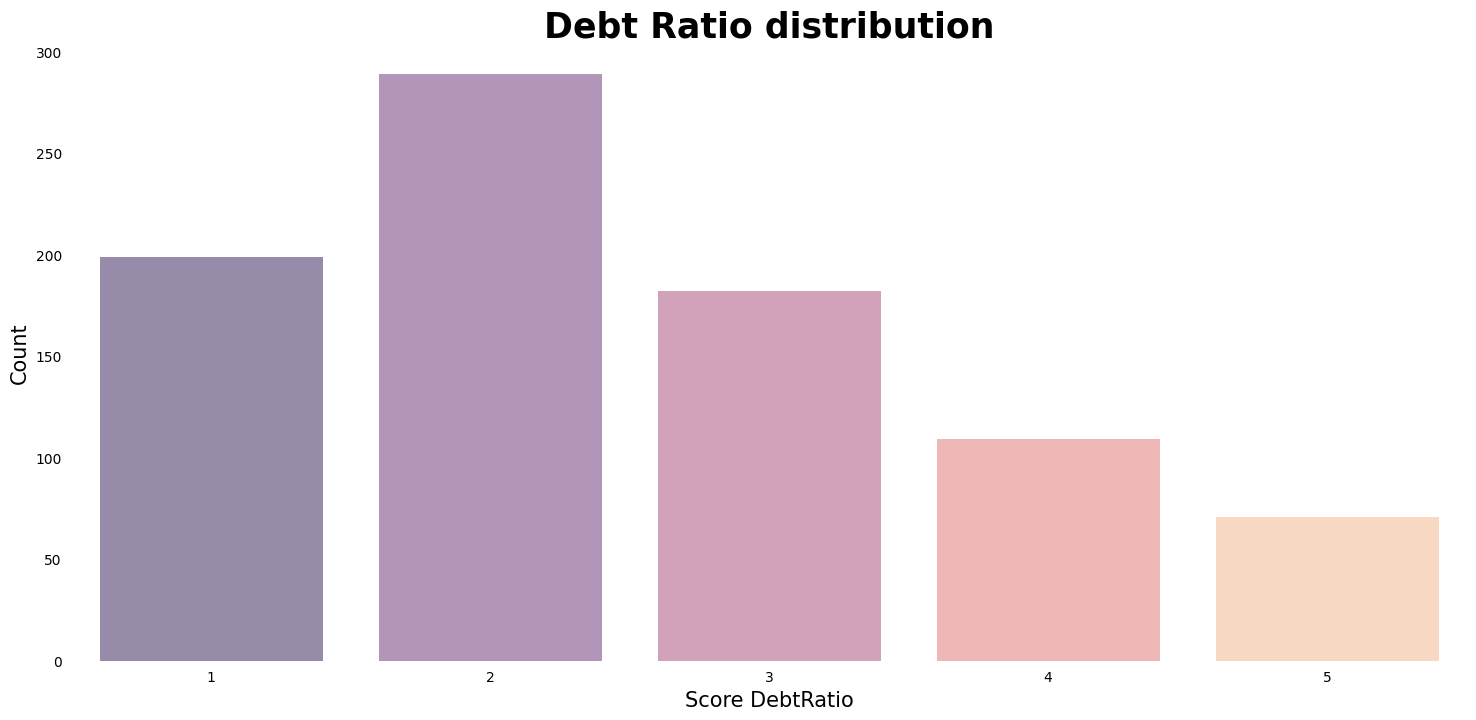

In [282]:
plt.figure(figsize=(18,8))

fontdict = {
    'fontname': 'sans-serif',
    'fontweight': 'bold',
    'fontsize': 25
}

fontdict2 = {
    'fontname': 'sans-serif',
    'fontweight': 'regular',
    'fontsize': 15
}

sns.countplot(x = df['Score DebtRatio'], palette='magma', alpha=0.5)

plt.xlabel('Score DebtRatio', fontdict=fontdict2)
plt.ylabel('Count', fontdict=fontdict2 )

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.title('Debt Ratio distribution', fontdict=fontdict)

#less is more -> get blank
ax = plt.gca()
for spine in ['top', 'right', 'left', 'bottom']:
    ax.spines[spine].set_visible(False)
ax.tick_params(left=False, bottom=False)

plt.show()

_________________________________

### Età

18–24 anni → Giovani / Entrata nel credito

studenti, primi lavori, redditi bassi, rischio più alto.

25–34 anni → Giovani adulti

fase di formazione nucleo familiare, aumento spese, mutui.

35–44 anni → Adulti consolidati

reddito in crescita, rischio medio-basso.

45–54 anni → Mezza età

picco di reddito, stabilità lavorativa, riduzione rischio.

55–64 anni → Pre-pensionamento

reddito ancora alto ma in calo, esposizione a prodotti previdenziali.

65+ anni → Pensionati

In [283]:
#fasce di età
a_bins= (0, 18, 25, 35, 45, 55, 65, 100)
a_lables= ('0-18', '18-25', '25-35', '35-45', '45-55', '55-65', '65+')

df['Age_label'] = pd.cut(df['Age'], bins=a_bins, labels=a_lables, right=False)
df.tail()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio,Total Debt,Total Debt(K),Income_label,Score Income,DebtRatio,DebtIncomeRatio (%),Score DebtRatio,Age_label
845,846,27,1,5,26,0.548,1.220,NaN,NBA007,6.8,1.768,1.768,Mass,1,0.068,6.8,2,25-35
846,847,28,2,7,34,0.359,2.021,0.0,NBA002,7.0,2.380,2.380,Mass,1,0.070,7.0,2,25-35
847,848,25,4,0,18,2.802,3.210,1.0,NBA001,33.4,6.012,6.012,Mass,1,0.334,33.4,5,25-35
848,849,32,1,12,28,0.116,0.696,0.0,NBA012,2.9,0.812,0.812,Mass,1,0.029,2.9,1,25-35
849,850,52,1,16,64,1.866,3.638,0.0,NBA025,8.6,5.504,5.504,Lower Affluent,2,0.086,8.6,2,45-55


In [284]:
#Score Età

def age_risk(age):
    if age < 25:
        return 4   # alto rischio
    elif 25 <= age < 35:
        return 3
    elif 35 <= age < 45:
        return 2
    elif 45 <= age < 55:
        return 1   # molto basso
    elif 55 <= age < 65:
        return 2
    else:
        return 3   # medio-alto

df['Score Age'] = df['Age'].apply(age_risk)

In [285]:
df.sample(10)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio,Total Debt,Total Debt(K),Income_label,Score Income,DebtRatio,DebtIncomeRatio (%),Score DebtRatio,Age_label,Score Age
10,11,44,3,8,88,0.285,5.083,1.0,NBA010,6.1,5.368,5.368,Lower Affluent,2,0.061,6.1,2,35-45,2
312,313,44,1,2,22,1.092,1.020,NaN,NBA015,9.6,2.112,2.112,Mass,1,0.096,9.6,2,35-45,2
767,768,36,1,9,40,1.976,1.944,0.0,NBA001,9.8,3.920,3.920,Mass,1,0.098,9.8,2,35-45,2
9,10,47,3,23,115,0.653,3.947,0.0,NBA011,4.0,4.600,4.600,Affluent,3,0.040,4.0,1,45-55,1
346,347,28,2,1,16,0.574,1.778,0.0,NBA004,14.7,2.352,2.352,Mass,1,0.147,14.7,3,25-35,3
774,775,36,3,11,44,0.446,6.022,0.0,NBA012,14.7,6.468,6.468,Mass,1,0.147,14.7,3,35-45,2
668,669,28,1,11,24,0.107,0.469,0.0,NBA006,2.4,0.576,0.576,Mass,1,0.024,2.4,1,25-35,3
294,295,27,2,6,34,0.238,1.258,0.0,NBA001,4.4,1.496,1.496,Mass,1,0.044,4.4,1,25-35,3
153,154,47,1,3,21,0.068,3.166,NaN,NBA001,15.4,3.234,3.234,Mass,1,0.154,15.4,4,45-55,1
285,286,35,2,1,24,0.417,1.455,NaN,NBA011,7.8,1.872,1.872,Mass,1,0.078,7.8,2,35-45,2


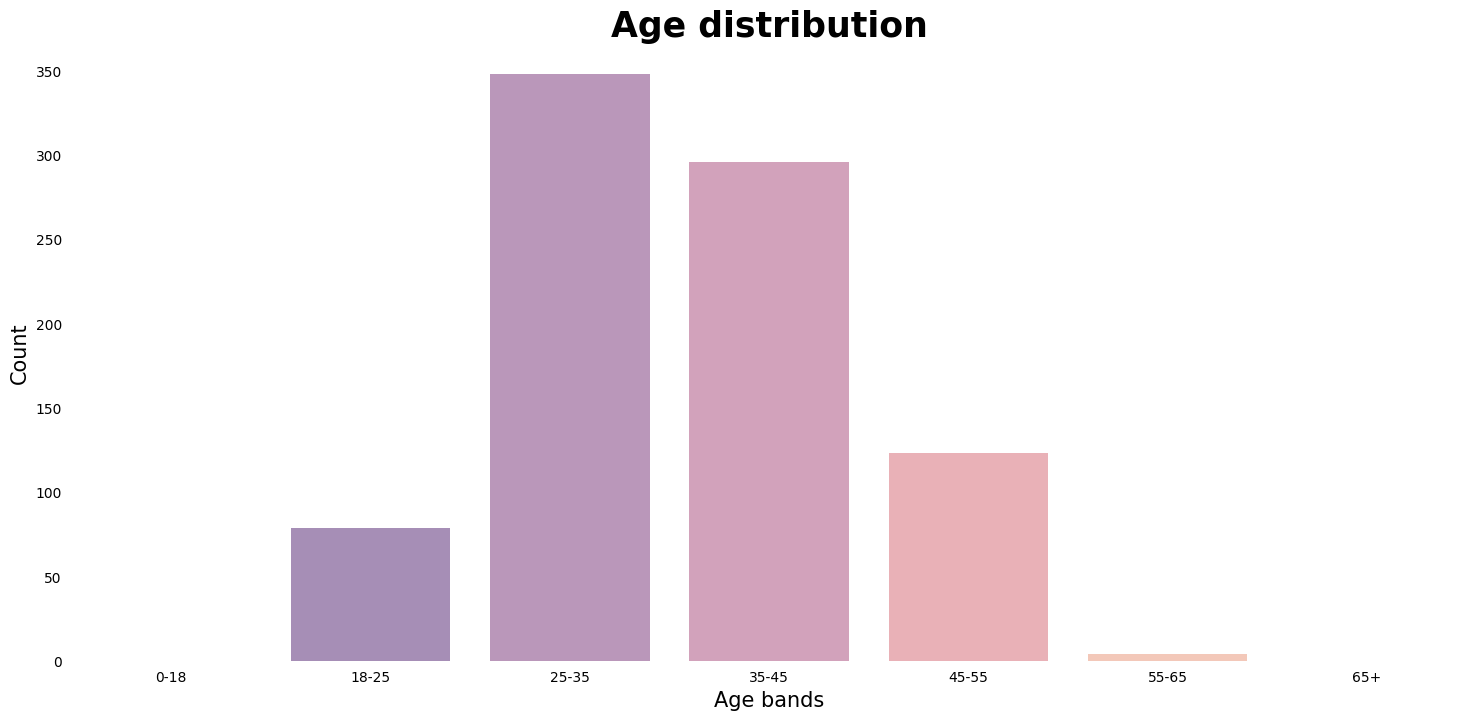

In [286]:
plt.figure(figsize=(18,8))

fontdict = {
    'fontname': 'sans-serif',
    'fontweight': 'bold',
    'fontsize': 25
}

fontdict2 = {
    'fontname': 'sans-serif',
    'fontweight': 'regular',
    'fontsize': 15
}

sns.countplot(x = df['Age_label'], palette='magma', alpha=0.5)

plt.xlabel('Age bands', fontdict=fontdict2)
plt.ylabel('Count', fontdict=fontdict2 )

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.title('Age distribution', fontdict=fontdict)

#less is more -> get blank
ax = plt.gca()
for spine in ['top', 'right', 'left', 'bottom']:
    ax.spines[spine].set_visible(False)
ax.tick_params(left=False, bottom=False)

plt.show()

In [287]:
df = df[
    [
        'Customer Id',
        'Age',
        'Age_label',
        'Edu',
        'Years Employed',
        'Income',
        'Income_label',
        'Address',
        'Card Debt',
        'Other Debt',
        'Total Debt',
        'Defaulted',
        'DebtRatio',
        'DebtIncomeRatio (%)',
        'Score Age',
        'Score Income',
        'Score DebtRatio'
    ]
]

### Età lavorativa

In [288]:
#Etichette

bins_ye = [0, 2, 5, 10, 20, float('inf')]
labels_ye = ['<2', '2–4', '5–9', '10–19', '20+']

df['Years Employed_label'] = pd.cut(df['Years Employed'], bins=bins_ye, labels=labels_ye, right=False)



In [289]:
df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Customer Id,Age,Age_label,Edu,Years Employed,Income,Income_label,Address,Card Debt,Other Debt,Total Debt,Defaulted,DebtRatio,DebtIncomeRatio (%),Score Age,Score Income,Score DebtRatio,Years Employed_label
0,1,41,35-45,2,6,19,Mass,NBA001,0.124,1.073,1.197,0.0,0.063,6.3,2,1,2,5–9
1,2,47,45-55,1,26,100,Affluent,NBA021,4.582,8.218,12.800,0.0,0.128,12.8,1,3,3,20+
2,3,33,25-35,2,10,57,Lower Affluent,NBA013,6.111,5.802,11.913,1.0,0.209,20.9,3,2,5,10–19
3,4,29,25-35,2,4,19,Mass,NBA009,0.681,0.516,1.197,0.0,0.063,6.3,3,1,2,2–4
4,5,47,45-55,1,31,253,Upper Affluent,NBA008,9.308,8.908,18.216,0.0,0.072,7.2,1,4,2,20+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,846,27,25-35,1,5,26,Mass,NBA007,0.548,1.220,1.768,NaN,0.068,6.8,3,1,2,5–9
846,847,28,25-35,2,7,34,Mass,NBA002,0.359,2.021,2.380,0.0,0.070,7.0,3,1,2,5–9
847,848,25,25-35,4,0,18,Mass,NBA001,2.802,3.210,6.012,1.0,0.334,33.4,3,1,5,<2
848,849,32,25-35,1,12,28,Mass,NBA012,0.116,0.696,0.812,0.0,0.029,2.9,3,1,1,10–19


In [290]:
#Score

score_map = {
    '<2': 5,
    '2–4': 4,
    '5–9': 3,
    '10–19': 2,
    '20+': 1
}

df['Score Years Employed'] = df['Years Employed_label'].map(score_map)

In [291]:
df.head()

,Customer Id,Age,Age_label,Edu,Years Employed,Income,Income_label,Address,Card Debt,Other Debt,Total Debt,Defaulted,DebtRatio,DebtIncomeRatio (%),Score Age,Score Income,Score DebtRatio,Years Employed_label,Score Years Employed
0,1,41,35-45,2,6,19,Mass,NBA001,0.124,1.073,1.197,0.0,0.063,6.3,2,1,2,5–9,3
1,2,47,45-55,1,26,100,Affluent,NBA021,4.582,8.218,12.800,0.0,0.128,12.8,1,3,3,20+,1
2,3,33,25-35,2,10,57,Lower Affluent,NBA013,6.111,5.802,11.913,1.0,0.209,20.9,3,2,5,10–19,2
3,4,29,25-35,2,4,19,Mass,NBA009,0.681,0.516,1.197,0.0,0.063,6.3,3,1,2,2–4,4
4,5,47,45-55,1,31,253,Upper Affluent,NBA008,9.308,8.908,18.216,0.0,0.072,7.2,1,4,2,20+,1


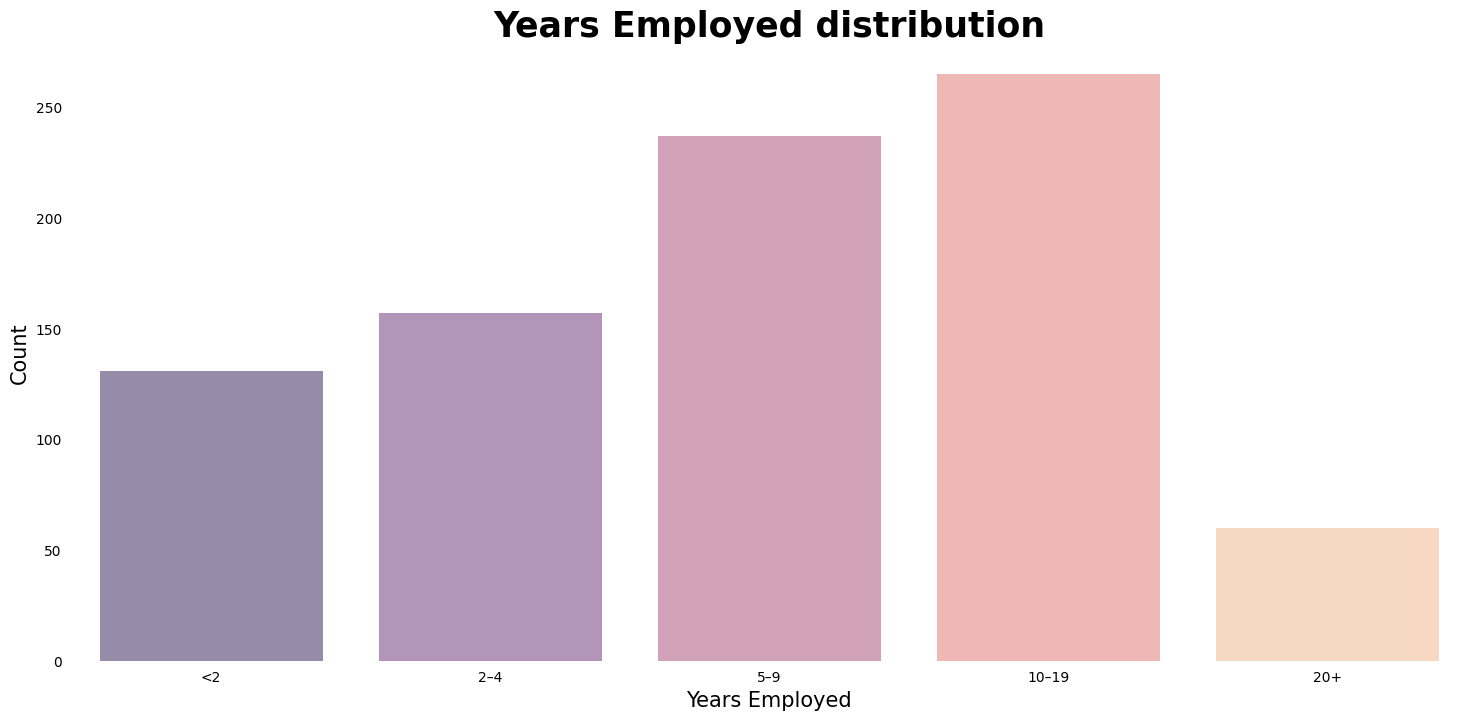

In [292]:
plt.figure(figsize=(18,8))

fontdict = {
    'fontname': 'sans-serif',
    'fontweight': 'bold',
    'fontsize': 25
}

fontdict2 = {
    'fontname': 'sans-serif',
    'fontweight': 'regular',
    'fontsize': 15
}

sns.countplot(x = df['Years Employed_label'], palette='magma', alpha=0.5)

plt.xlabel('Years Employed', fontdict=fontdict2)
plt.ylabel('Count', fontdict=fontdict2 )

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.title('Years Employed distribution', fontdict=fontdict)

#less is more -> get blank
ax = plt.gca()
for spine in ['top', 'right', 'left', 'bottom']:
    ax.spines[spine].set_visible(False)
ax.tick_params(left=False, bottom=False)

plt.show()

In [293]:
df = df[
    [
        'Customer Id',
        'Age',
        'Age_label',
        'Edu',
        'Years Employed',
        'Years Employed_label',
        'Income',
        'Income_label',
        'Address',
        'Card Debt',
        'Other Debt',
        'Total Debt',
        'Defaulted',
        'DebtRatio',
        'DebtIncomeRatio (%)',
        'Score Age',
        'Score Income',
        'Score DebtRatio',
        'Score Years Employed'
    ]
]
df.sample()

,Customer Id,Age,Age_label,Edu,Years Employed,Years Employed_label,Income,Income_label,Address,Card Debt,Other Debt,Total Debt,Defaulted,DebtRatio,DebtIncomeRatio (%),Score Age,Score Income,Score DebtRatio,Score Years Employed
132,133,31,25-35,2,6,5–9,25,Mass,NBA005,2.332,0.543,2.875,0.0,0.115,11.5,3,1,3,3


______

# Credit scoring

## Preparazione dataset

In [294]:
df= df.dropna()

In [295]:
df.isna().sum()

Customer Id             0
Age                     0
Age_label               0
Edu                     0
Years Employed          0
Years Employed_label    0
Income                  0
Income_label            0
Address                 0
Card Debt               0
Other Debt              0
Total Debt              0
Defaulted               0
DebtRatio               0
DebtIncomeRatio (%)     0
Score Age               0
Score Income            0
Score DebtRatio         0
Score Years Employed    0
dtype: int64

In [296]:
df.shape

(700, 19)

## Regressione logisitica

In [297]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Split train/test
X = df[['Income', 'DebtRatio', 'Total Debt', 'Years Employed', 'Age']]
y = df["Defaulted"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Probabilità di default = Risk Score
df['risk_score'] = model.predict_proba(X)[:,1]

# Classificazione rischio (Low/Med/High)
df['risk_class'] = pd.qcut(df['risk_score'], q=5, labels=['Very low', 'Low', 'Medium', 'High', 'Very high'])

print(df[['Income', 'DebtRatio', 'Total Debt', 'Years Employed', 'Age', "risk_score", "risk_class"]])
print('AUC:', roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))


     Income  DebtRatio  Total Debt  Years Employed  Age  risk_score risk_class
0        19      0.063       1.197               6   41    0.131106     Medium
1       100      0.128      12.800              26   47    0.014741   Very low
2        57      0.209      11.913              10   33    0.599702  Very high
3        19      0.063       1.197               4   29    0.196885     Medium
4       253      0.072      18.216              31   47    0.002445   Very low
..      ...        ...         ...             ...  ...         ...        ...
844      43      0.044       1.892               7   41    0.091570        Low
846      34      0.070       2.380               7   28    0.118162     Medium
847      18      0.334       6.012               0   25    0.827927  Very high
848      28      0.029       0.812              12   32    0.021346   Very low
849      64      0.086       5.504              16   52    0.025649   Very low

[700 rows x 7 columns]
AUC: 0.779038112522686


In [298]:
df['risk_score']

0      0.131106
1      0.014741
2      0.599702
3      0.196885
4      0.002445
         ...   
844    0.091570
846    0.118162
847    0.827927
848    0.021346
849    0.025649
Name: risk_score, Length: 700, dtype: float64

In [299]:
#assegnazione etichette di rischio

df['risk_class'] = pd.cut(df['risk_score'],
                          bins=[0, 0.2, 0.4, 0.6, 0.8, 1],
                          labels=['Very low', 'Low', 'Medium', 'High', 'Very high'])

In [300]:
df

,Customer Id,Age,Age_label,Edu,Years Employed,Years Employed_label,Income,Income_label,Address,Card Debt,...,Total Debt,Defaulted,DebtRatio,DebtIncomeRatio (%),Score Age,Score Income,Score DebtRatio,Score Years Employed,risk_score,risk_class
0,1,41,35-45,2,6,5–9,19,Mass,NBA001,0.124,...,1.197,0.0,0.063,6.3,2,1,2,3,0.131106,Very low
1,2,47,45-55,1,26,20+,100,Affluent,NBA021,4.582,...,12.800,0.0,0.128,12.8,1,3,3,1,0.014741,Very low
2,3,33,25-35,2,10,10–19,57,Lower Affluent,NBA013,6.111,...,11.913,1.0,0.209,20.9,3,2,5,2,0.599702,Medium
3,4,29,25-35,2,4,2–4,19,Mass,NBA009,0.681,...,1.197,0.0,0.063,6.3,3,1,2,4,0.196885,Very low
4,5,47,45-55,1,31,20+,253,Upper Affluent,NBA008,9.308,...,18.216,0.0,0.072,7.2,1,4,2,1,0.002445,Very low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844,845,41,35-45,1,7,5–9,43,Mass,NBA011,0.694,...,1.892,0.0,0.044,4.4,2,1,1,3,0.091570,Very low
846,847,28,25-35,2,7,5–9,34,Mass,NBA002,0.359,...,2.380,0.0,0.070,7.0,3,1,2,3,0.118162,Very low
847,848,25,25-35,4,0,<2,18,Mass,NBA001,2.802,...,6.012,1.0,0.334,33.4,3,1,5,5,0.827927,Very high
848,849,32,25-35,1,12,10–19,28,Mass,NBA012,0.116,...,0.812,0.0,0.029,2.9,3,1,1,2,0.021346,Very low


In [301]:
df['risk_class'].value_counts()

risk_class
Very low     372
Low          158
Medium       107
High          40
Very high     23
Name: count, dtype: int64

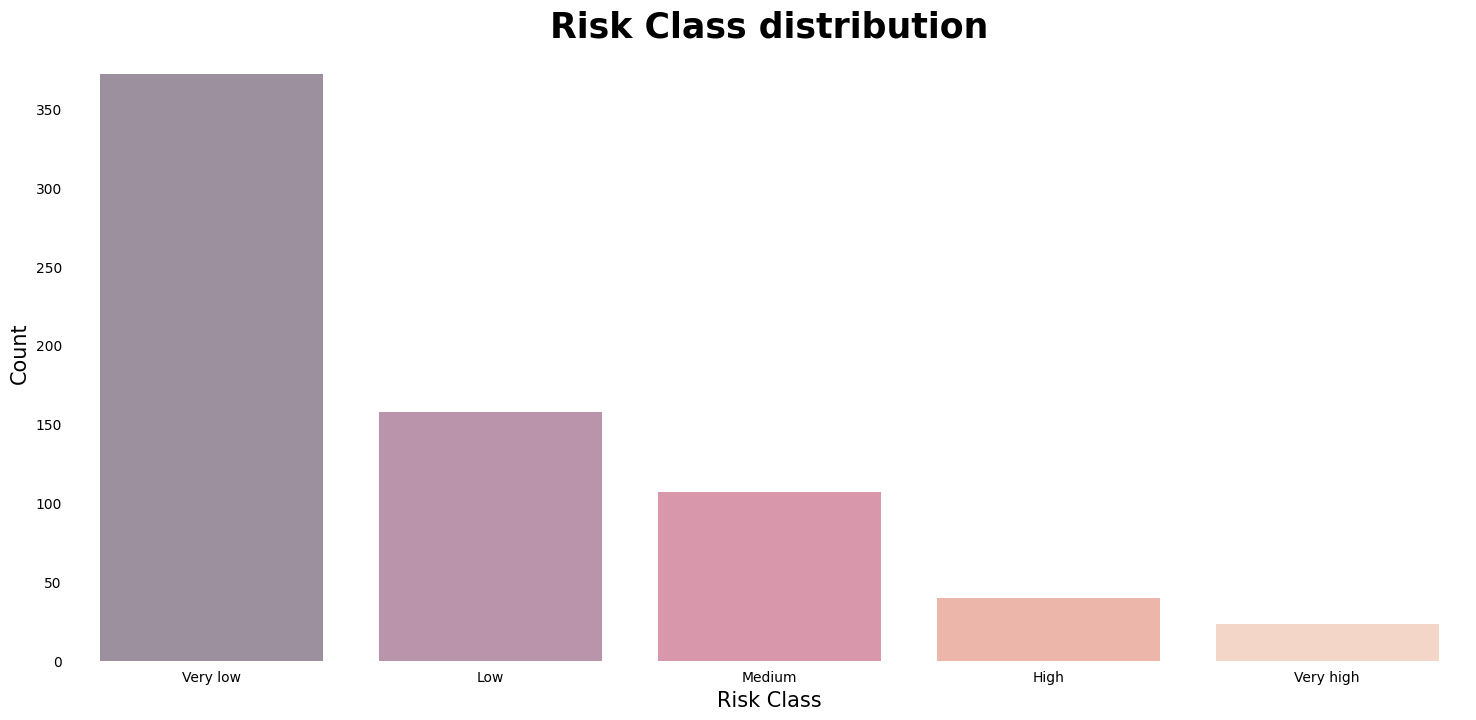

In [302]:
plt.figure(figsize=(18,8))

fontdict = {
    'fontname': 'sans-serif',
    'fontweight': 'bold',
    'fontsize': 25
}

fontdict2 = {
    'fontname': 'sans-serif',
    'fontweight': 'regular',
    'fontsize': 15
}

sns.countplot(x = df['risk_class'], alpha=0.5, palette='rocket')

plt.xlabel('Risk Class', fontdict=fontdict2)
plt.ylabel('Count', fontdict=fontdict2 )

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.title('Risk Class distribution', fontdict=fontdict)

#less is more -> get blank
ax = plt.gca()
for spine in ['top', 'right', 'left', 'bottom']:
    ax.spines[spine].set_visible(False)
ax.tick_params(left=False, bottom=False)

plt.show()